## 地理数据可视化basemap
数据科学中一种常见的可视化类型是地理数据。 Matplotlib用于这种类型的可视化的主要工具是底图工具包，它是mpl_toolkits命名空间下的几个Matplotlib工具包之一。诚然，底图的使用有点笨拙，而且即使是简单的可视化效果，渲染时间通常也比您希望的长得多。对于更密集的地图可视化，更现代的解决方案（例如传单或Google Maps API）可能是更好的选择。尽管如此，底图仍然是Python用户在其虚拟工具栏中拥有的有用工具。在本节中，我们将显示此工具包可能提供的几种地图可视化类型的示例。

 
basemap的安装非常简单；如果您使用的是conda，则可以输入以下内容，然后将下载软件包：

>conda install basemap
或者
>pip install --user git+https://github.com/matplotlib/basemap.git 

也可以源码安装:https://github.com/matplotlib/basemap

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

一旦安装并导入了底图工具包，地理图就在几行之内（以下图形也需要Python 2中的PIL包或Python 3中的pillow包）：

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


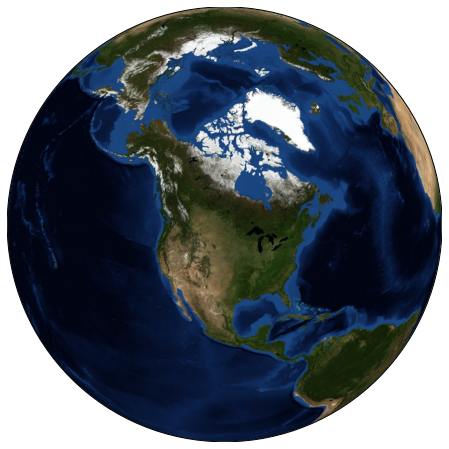

In [5]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

即将讨论底图的参数的含义。

有用的是，此处显示的地球不仅仅是一张图像；它是功能齐全的Matplotlib轴，可以理解球面坐标，并允许我们在地图上轻松绘制数据！例如，我们可以使用其他地图投影，放大到北美，然后绘制西雅图的位置。我们将使用etopo图像（显示陆地和海洋下的地形特征）作为地图背景：

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


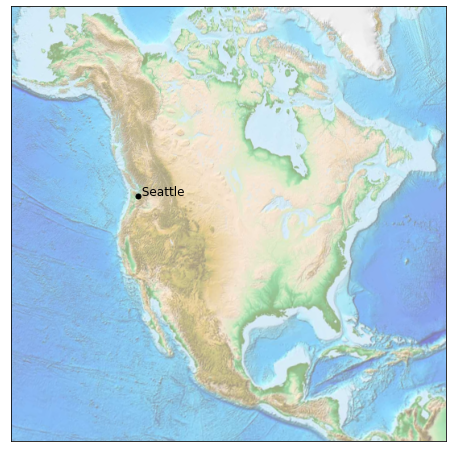

In [6]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

 
这使您可以简要了解仅需几行Python即可实现的地理可视化。现在，我们将更深入地讨论底图的功能，并提供一些可视化地图数据的示例。使用这些简短的示例作为构建块，您应该几乎可以创建所需的任何地图可视化。